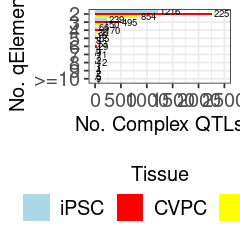

In [32]:
source("~/software/notebook_assist/packages.R")
source("~/software/notebook_assist/functions.R")
setwd("~/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData")


## load source data
a_data = fread("SOURCEDATA.FIGURE4A.txt",sep="\t",data.table=F)


a_data$Tissue = factor(a_data$Tissue, levels = rev(c("iPSC","CVPC","PPC")))
a_data$qElements_inQTL = factor(a_data$qElements_inQTL, levels = rev(c(1:9,">=10")))

a = ggplot(a_data, aes(qElements_inQTL, No_ComplexQTLs, fill = Tissue)) + theme_bw2 +
        ylim(c(0,2500)) + xlab("No. qElements") + ylab("No. Complex QTLs") +
    geom_bar(stat="identity", position ="dodge") +  theme(legend.position = "bottom") +
    scale_fill_manual(values = c("yellow","red","lightblue"), guide = guide_legend(reverse = TRUE,
                                                                                  title.position="top", title.hjust = 0.5) ) + 
    geom_text(aes(label=No_ComplexQTLs), position=position_dodge(width=0.9), hjust=-0.1,size=2) + 

    coord_flip()

a

iPSC

CVPC

iPSC

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


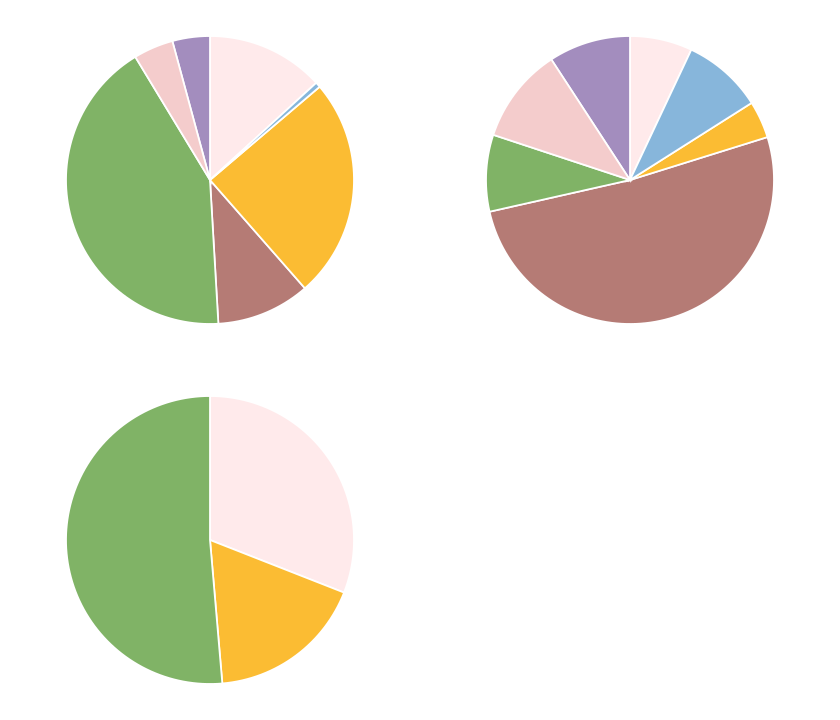

In [64]:

bcd_data = fread("SOURCEDATA.FIGURE4BCD.txt",sep="\t",data.table=F, header=T)
bcd_data$n_occur =1 

make_pie = function(tissue) {
    if (tissue %in% c("iPSC", "CVPC")) {
        message(tissue)
        tissue_cast = bcd_data[ bcd_data$Tissue == tissue, ]
        pie_df = as.data.frame(table(tissue_cast$Annotation)) %>% rename(`Module Composition` = Var1)

        pie_df$`Module Composition` = factor(pie_df$`Module Composition`, 
                                             levels = c("eGene,caPeak,haPeak", "eGene,haPeak", "eGene,caPeak", "caPeak,haPeak",
                                                        "eGene", "haPeak", "caPeak"))
        pie_df <- pie_df %>% 
                  mutate(prop = Freq / sum(Freq) * 100)
        
        supb = ggplot(pie_df, aes(x = "", y = prop, fill = `Module Composition`)) +
                
               geom_bar(stat = "identity", width = 1, color = "white") +
               coord_polar("y", start = 0) + 
               theme_void() + 
               scale_fill_manual(values = rev(c("#FFEAEB", "#87b6db", "#fbbc33", "#b57b75", "#80b366", "#f4cccc", "#a38dbe"))) + 
                theme(legend.text=element_text(size=6),legend.title=element_text(size=8))  

    } else {
        tissue_cast = bcd_data[ bcd_data$Tissue == tissue, ]
        pie_df = as.data.frame(table(tissue_cast$Annotation)) %>% rename(`Module Composition` = Var1)
        pie_df$`Module Composition` = factor(pie_df$`Module Composition`, levels = c("eGene,caPeak", "eGene", "caPeak"))
        pie_df <- pie_df %>% 
                  mutate(prop = Freq / sum(Freq) * 100)
        supb = ggplot(pie_df, aes(x = "", y = prop, fill = `Module Composition`)) +
               geom_bar(stat = "identity", width = 1, color = "white") +
               coord_polar("y", start = 0) + 
               theme_void() + scale_fill_manual(values = rev(c("#FFEAEB", "#fbbc33", "#80b366")))
    }
    return(supb + guides(fill=guide_legend(title="Complex QTL\nqElement Composition")))
}


b = make_pie("iPSC") + theme(legend.position = "none")

c = make_pie("CVPC") + theme(legend.position = "none")
d = make_pie("PPC") + theme(legend.position = "none")
leg = get_legend(make_pie("iPSC"))


psize(7,6)
pies = plot_grid(b,c,d,nrow = 2)
pies

In [66]:
psize(2,2)
png("~/projects/Resource/figures/Revisions/figure4bd_legend.png",res=300,units="in",height=2,width=1.8)
plot_grid(leg)
dev.off()

png 
  2

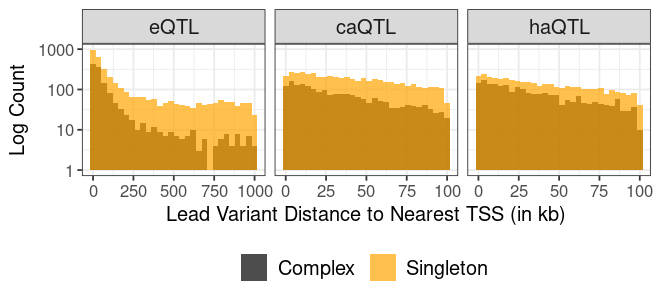

In [49]:
psize(5.5,2.5)
e_data = fread("SOURCEDATA.FIGURE4E.txt",sep="\t",data.table=F)


e_data$QTL_Type = ifelse(e_data$qElement_Type == "eGene", "eQTL",
                               ifelse(e_data$qElement_Type == "caPeak", "caQTL","haQTL"))
e_data$QTL_Type = factor(e_data$QTL_Type, levels = c("eQTL","caQTL","haQTL"))

# png("~/projects/Resource/figures/Revisions/figure4e.png",res=300,units="in",height=2.5,width=5.5)
ggplot(e_data[ order(e_data$Complexity),], aes(x = min_distance/1000, fill = Complexity)) +
  geom_histogram(bins = 30, alpha = 0.7, position = "identity") +  
  facet_wrap(~QTL_Type, scales = "free_x") +
  scale_y_log10() +  
  labs(x = "Lead Variant Distance to Nearest TSS (in kb)",y = "Log Count") +
  scale_fill_manual(values = c("Complex" = "black", "Singleton" = "orange")) + theme_bw2 +
  theme(strip.text.x = element_text(size = 10),legend.position = "bottom",
    legend.title = element_blank())
dev.off()